# Customer Churn Prediction: Step-by-Step Tutorial

This comprehensive tutorial walks through the entire process of building a customer churn prediction model with high accuracy. Each step will show both the proper technique and demonstrate what happens if we skip it, to illustrate its importance.

## Table of Contents
1. [Data Loading and Initial Exploration](#1-data-loading-and-initial-exploration)
2. [Data Cleaning](#2-data-cleaning)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
4. [Feature Engineering](#4-feature-engineering)
5. [Data Preprocessing](#5-data-preprocessing)
6. [Model Building](#6-model-building)
7. [Model Evaluation](#7-model-evaluation)
8. [Model Improvement](#8-model-improvement)
9. [Final Model and Interpretation](#9-final-model-and-interpretation)

In [40]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, RFE


from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set visualization style

sns.set_style("whitegrid")  # من Seaborn نفسها
sns.set_palette("Set2")

### Load the dataset


In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
print("Dataset shape:", df.shape)


Dataset shape: (7043, 21)


In [4]:
print("\nFirst 5 rows of the dataset:")
df.head()




First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Basic information about the dataset
print("\nDataset information:")
df.info()




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70


### 📄 **Column Descriptions:**

| # | Column | Description |
|--|--------|-------------|
| 0 | **customerID** | A unique identifier for each customer. |
| 1 | **gender** | The customer's gender (`Male` or `Female`). |
| 2 | **SeniorCitizen** | Indicates if the customer is a senior citizen (`1` = Yes, `0` = No). |
| 3 | **Partner** | Whether the customer has a partner (`Yes` or `No`). |
| 4 | **Dependents** | Whether the customer has dependents (like children, etc.) (`Yes` or `No`). |
| 5 | **tenure** | The number of months the customer has stayed with the company. |
| 6 | **PhoneService** | Whether the customer has a phone service (`Yes` or `No`). |
| 7 | **MultipleLines** | Whether the customer has multiple phone lines (`Yes`, `No`, or `No phone service`). |
| 8 | **InternetService** | Type of internet service the customer has (`DSL`, `Fiber optic`, or `No`). |
| 9 | **OnlineSecurity** | Whether the customer has online security service (`Yes`, `No`, or `No internet service`). |
| 10 | **OnlineBackup** | Whether the customer uses online backup services (`Yes`, `No`, or `No internet service`). |
| 11 | **DeviceProtection** | Whether the customer has device protection (`Yes`, `No`, or `No internet service`). |
| 12 | **TechSupport** | Whether the customer has technical support (`Yes`, `No`, or `No internet service`). |
| 13 | **StreamingTV** | Whether the customer streams TV (`Yes`, `No`, or `No internet service`). |
| 14 | **StreamingMovies** | Whether the customer streams movies (`Yes`, `No`, or `No internet service`). |
| 15 | **Contract** | Type of contract: `Month-to-month`, `One year`, or `Two year`. |
| 16 | **PaperlessBilling** | Whether the customer receives paperless billing (`Yes` or `No`). |
| 17 | **PaymentMethod** | How the customer pays: `Electronic check`, `Mailed check`, `Bank transfer`, or `Credit card`. |
| 18 | **MonthlyCharges** | The amount charged to the customer each month (float). |
| 19 | **TotalCharges** | Total amount charged over the customer's tenure (note: stored as a string/object). |
| 20 | **Churn** | Whether the customer has left the service (`Yes` = Churned, `No` = Still active). This is likely your **target variable** if you're doing prediction. |


In [6]:
print("\nBasic statistics:")
df.describe()


Basic statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
print("\nChurn distribution:")
df['Churn'].value_counts()


Churn distribution:


,count
Churn,
No,5174
Yes,1869


In [8]:

df['Churn'].value_counts(normalize=True).round(3)



,proportion
Churn,
No,0.735
Yes,0.265


In [9]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 2. Data Cleaning

In [10]:
# Create a copy of the dataframe
df_cleaned = df.copy()

# Check for duplicate rows
duplicate_rows = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [11]:
# Convert TotalCharges to numeric (handling any non-numeric values)
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')



##### ✅ What it does:

1. **Converts** the `'TotalCharges'` column (which is likely of `object` type, i.e. string) into **numeric (float)**.

2. **`errors='coerce'`** tells pandas:  
   > "If a value **can’t** be converted to a number, **replace it with `NaN` instead of throwing an error.**"



In [12]:
# Check for missing values after conversion
print("Missing values after conversion:")
print(df_cleaned.isnull().sum())

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
 df_cleaned[df_cleaned['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
# We notice that rows with missing TotalCharges have tenure = 0
# This makes sense - new customers haven't been charged yet
# Let's impute with 0 (or we could use the mean/median of customers with tenure=0)
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(0)
print("Missing values filled.")

Missing values filled.


In [15]:

# Convert categorical yes/no columns to binary
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df_cleaned[binary_columns] = df_cleaned[binary_columns].replace({'Yes': 1, 'No': 0})


In [16]:
# Convert SeniorCitizen from integer (0, 1) to descriptive values for better understanding
df_cleaned['SeniorCitizen'] = df_cleaned['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [17]:
# Print a summary of the cleaned data
print("\nCleaned Dataset Summary:")
df_cleaned.info()



Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

### Impact on model performance if data cleaning is skipped

In [18]:
# Let's demonstrate what happens if we skip data cleaning
# For example, if we don't convert TotalCharges to numeric

def demonstrate_cleaning_impact():
    # Create a copy of the original dataframe
    df_uncleaned = df.copy()

    # Split uncleaned data (with string TotalCharges)
    X = df_uncleaned.drop('Churn', axis=1)
    y = df_uncleaned['Churn'].replace({'Yes': 1, 'No': 0})

    try:
        # Try to train a model (this will fail due to non-numeric TotalCharges)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        print("Model trained successfully (unexpectedly).")
    except Exception as e:
        print(f"Error when using uncleaned data: {e}")
        print("This demonstrates why data cleaning is essential!")

    print("\nWith proper data cleaning, the model can be trained without these errors.")


demonstrate_cleaning_impact()

Error when using uncleaned data: could not convert string to float: '4906-ZHGPK'
This demonstrates why data cleaning is essential!

With proper data cleaning, the model can be trained without these errors.


## 3. Exploratory Data Analysis

### Run EDA functions

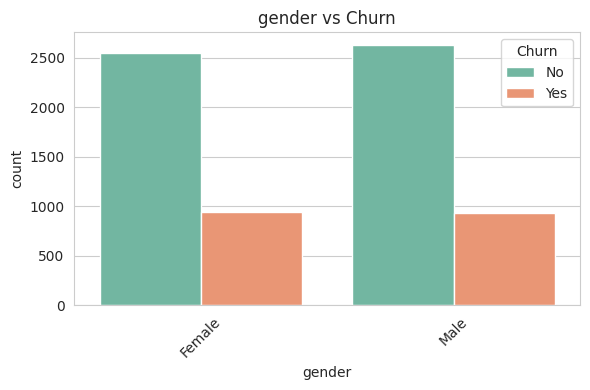

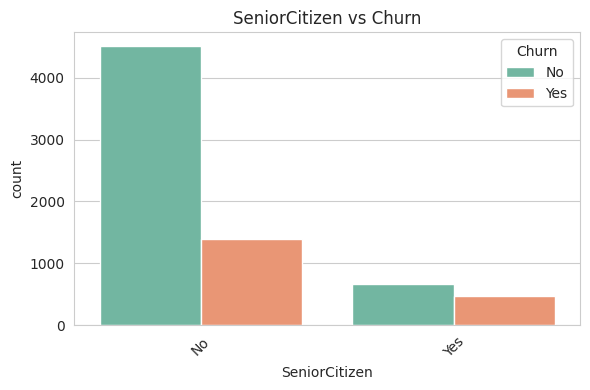

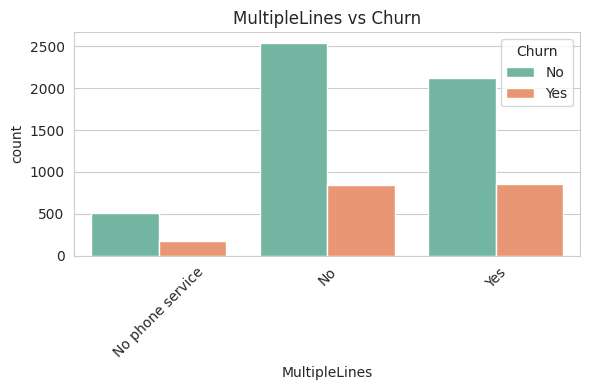

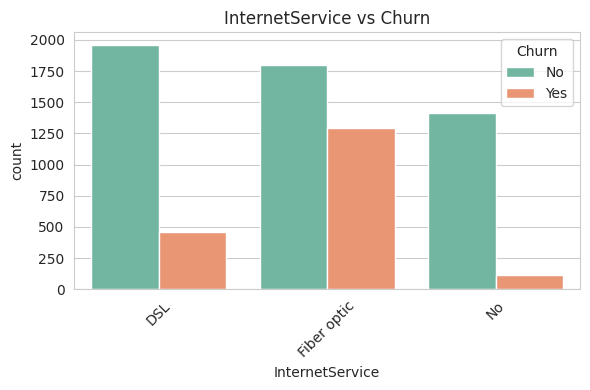

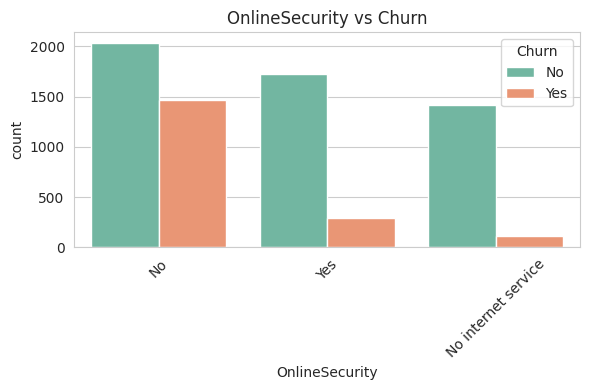

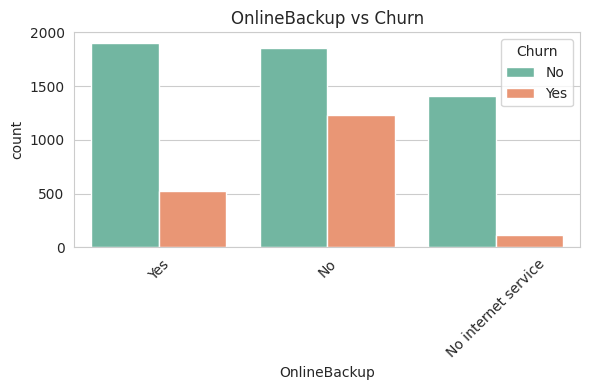

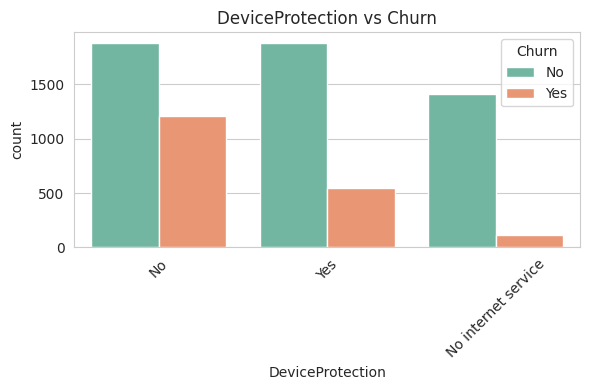

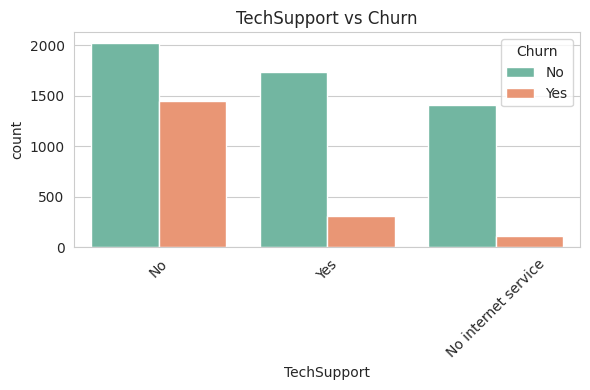

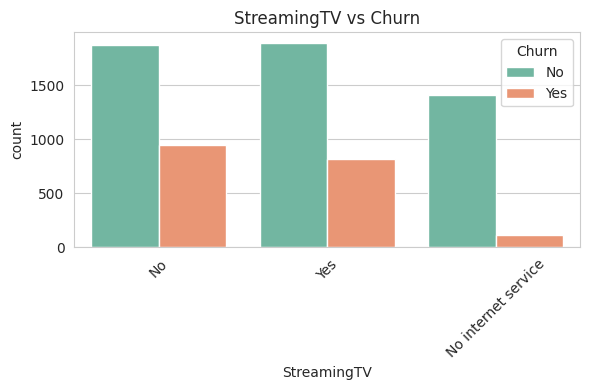

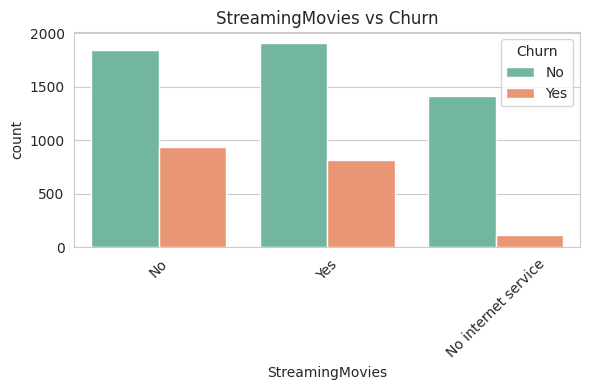

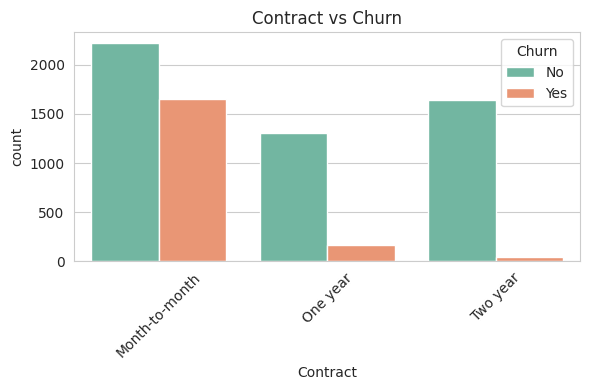

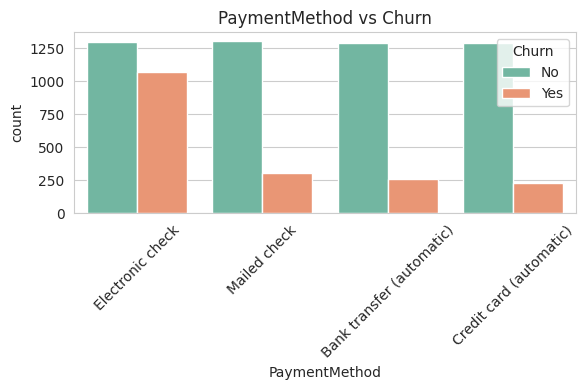

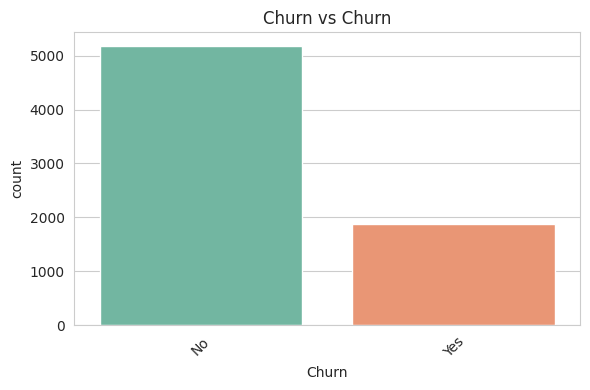

In [19]:
# Make a copy of the cleaned dataset for analysis
df_analysis = df_cleaned.copy()

# Convert 'Churn' column back to Yes/No for better interpretation in plots
df_analysis['Churn'] = df_analysis['Churn'].replace({1: 'Yes', 0: 'No'})

# Convert 'TotalCharges' to numeric, handle errors
df_analysis['TotalCharges'] = pd.to_numeric(df_analysis['TotalCharges'], errors='coerce')

# Identify categorical columns (excluding 'customerID')
categorical_cols = [col for col in df_analysis.columns if df_analysis[col].dtype == 'object' and col != 'customerID']

# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


def plot_categorical_analysis(df, cat_cols, target='Churn'):
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue=target)
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Run the analysis function
plot_categorical_analysis(df_analysis, categorical_cols)


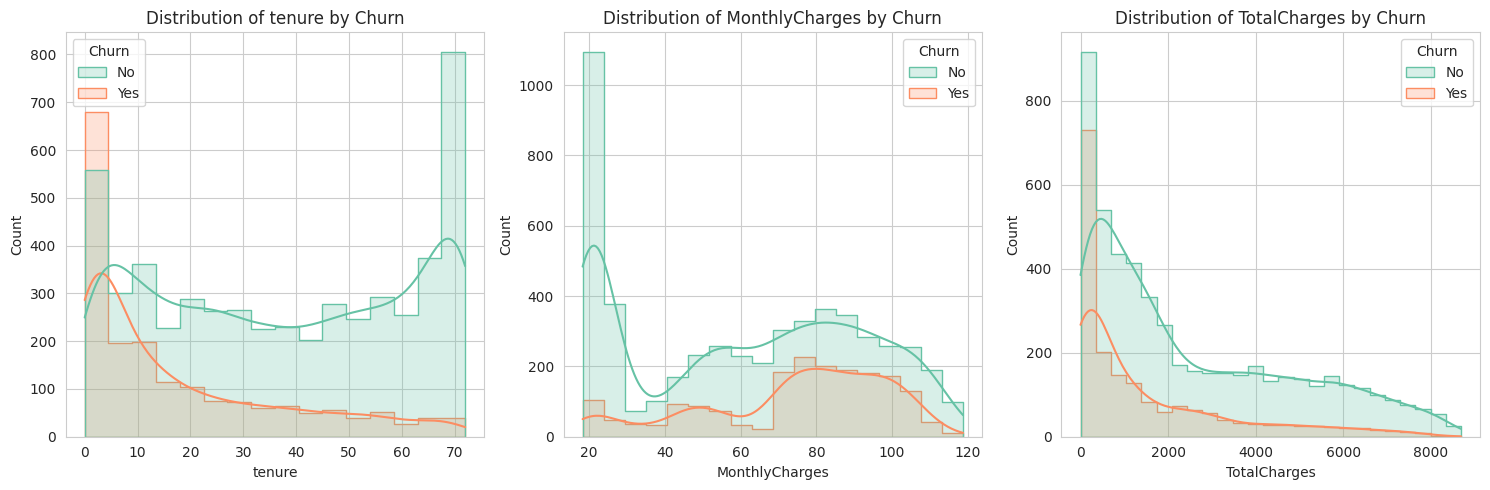

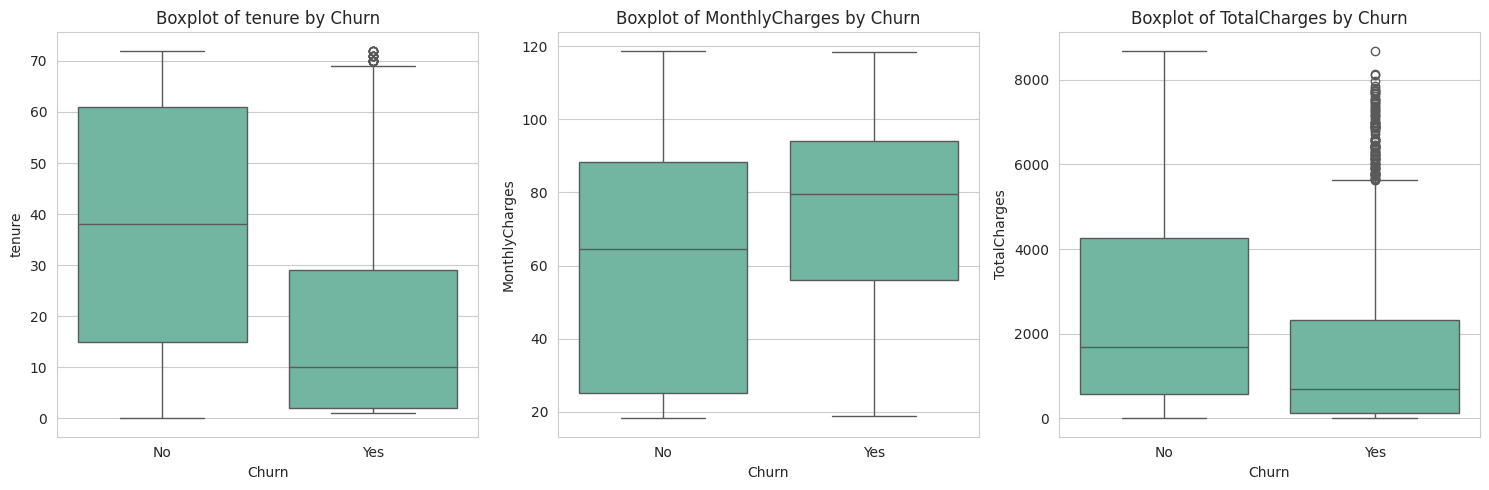

In [20]:
def plot_numerical_analysis(df, numerical_cols):
    plt.figure(figsize=(15, 5))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step')
        plt.title(f'Distribution of {col} by Churn')

    plt.tight_layout()
    plt.savefig('numerical_analysis.png')
    plt.show()

    # Boxplots to identify outliers
    plt.figure(figsize=(15, 5))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=df, x='Churn', y=col)
        plt.title(f'Boxplot of {col} by Churn')

    plt.tight_layout()
    plt.savefig('numerical_boxplots.png')
    plt.show()

plot_numerical_analysis(df_analysis, numerical_cols)


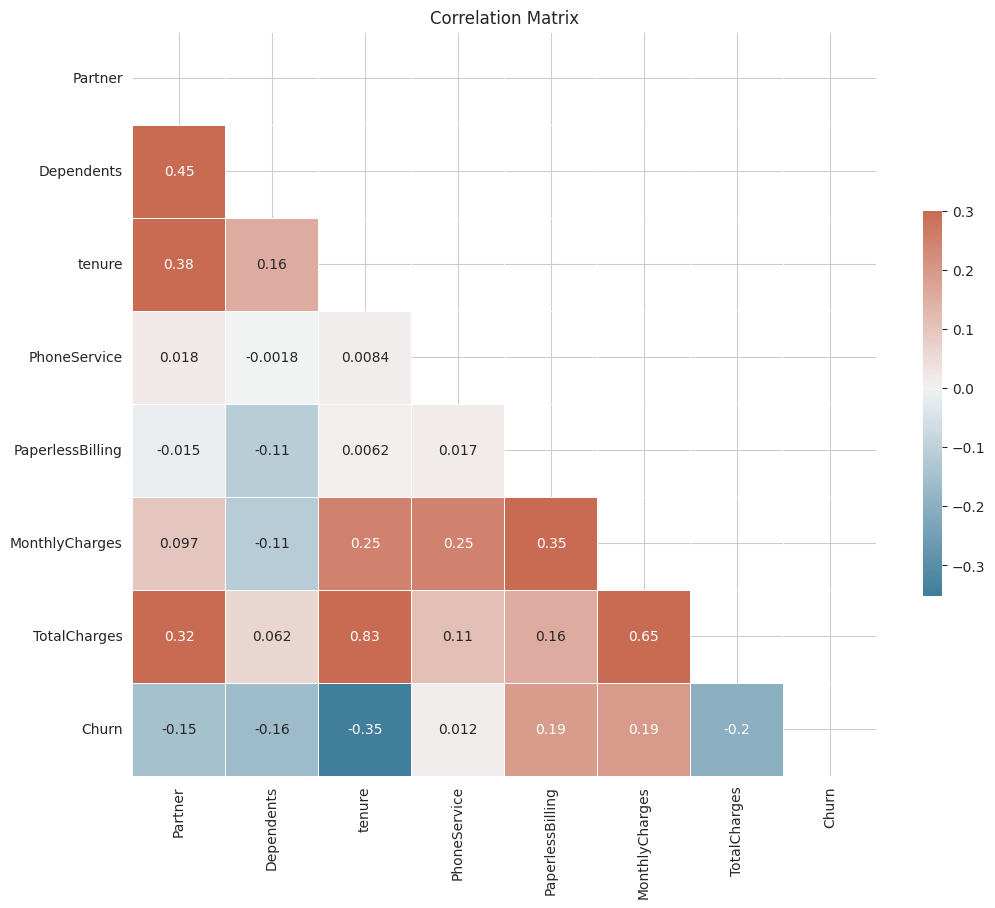

In [21]:
def plot_correlation_matrix(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr = numeric_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.show()

plot_correlation_matrix(df_cleaned)


### Analysis of feature importance

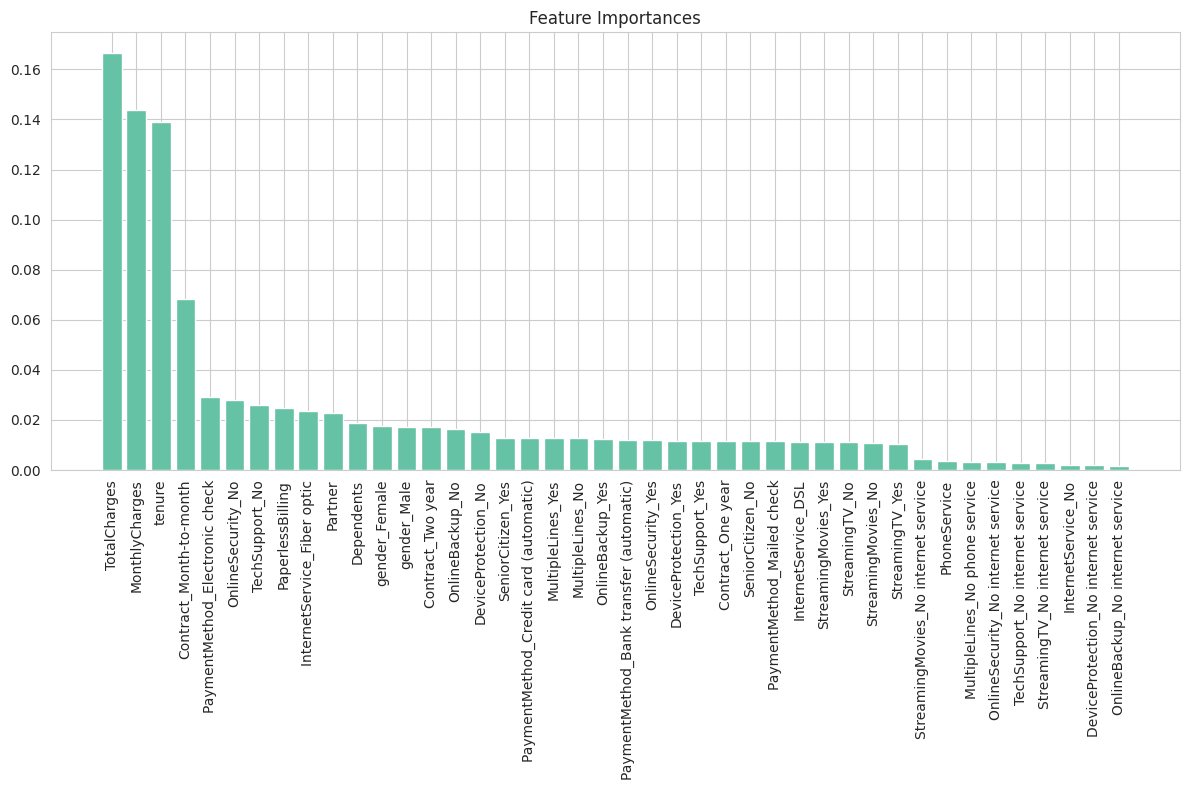

Feature Importance Ranking:
1. TotalCharges: 0.1665
2. MonthlyCharges: 0.1436
3. tenure: 0.1390
4. Contract_Month-to-month: 0.0683
5. PaymentMethod_Electronic check: 0.0292
6. OnlineSecurity_No: 0.0280
7. TechSupport_No: 0.0261
8. PaperlessBilling: 0.0248
9. InternetService_Fiber optic: 0.0234
10. Partner: 0.0228
11. Dependents: 0.0186
12. gender_Female: 0.0176
13. gender_Male: 0.0173
14. Contract_Two year: 0.0171
15. OnlineBackup_No: 0.0165
16. DeviceProtection_No: 0.0150
17. SeniorCitizen_Yes: 0.0130
18. PaymentMethod_Credit card (automatic): 0.0129
19. MultipleLines_Yes: 0.0129
20. MultipleLines_No: 0.0129
21. OnlineBackup_Yes: 0.0124
22. PaymentMethod_Bank transfer (automatic): 0.0122
23. OnlineSecurity_Yes: 0.0121
24. DeviceProtection_Yes: 0.0116
25. TechSupport_Yes: 0.0116
26. Contract_One year: 0.0115
27. SeniorCitizen_No: 0.0114
28. PaymentMethod_Mailed check: 0.0114
29. InternetService_DSL: 0.0112
30. StreamingMovies_Yes: 0.0112
31. StreamingTV_No: 0.0112
32. StreamingMovies_N

In [22]:
def initial_feature_importance(df):
    # Prepare data
    X = df.drop(['customerID', 'Churn'], axis=1)
    y = df['Churn']

    # Handle categorical features
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # Create pipeline with random forest
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X, y)

    # Extract feature names after one-hot encoding
    feature_names = (
        list(numerical_cols) +
        list(pipeline.named_steps['preprocessor']
            .named_transformers_['cat']
            .get_feature_names_out(categorical_cols))
    )

    # Extract feature importances
    importances = pipeline.named_steps['classifier'].feature_importances_

    # Sort feature importances
    indices = np.argsort(importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig('feature_importances.png')
    plt.show()

    return [(feature_names[i], importances[i]) for i in indices]

# Uncomment to run initial feature importance analysis
feature_importance = initial_feature_importance(df_cleaned)
print("Feature Importance Ranking:")
for i, (feature, importance) in enumerate(feature_importance, 1):
  print(f"{i}. {feature}: {importance:.4f}")

## 4. Feature Engineering

In [23]:
def engineer_features(df):
    # Create a copy of the dataframe
    df_engineered = df.copy()

    # Calculate customer lifetime value (CLV)
    df_engineered['CLV'] = df_engineered['tenure'] * df_engineered['MonthlyCharges']

    # Create binary flag for customers with tech services
    df_engineered['HasTechServices'] = ((df_engineered['OnlineSecurity'] == 'Yes') |
                                       (df_engineered['OnlineBackup'] == 'Yes') |
                                       (df_engineered['DeviceProtection'] == 'Yes') |
                                       (df_engineered['TechSupport'] == 'Yes')).astype(int)

    # Create binary flag for customers with entertainment services
    df_engineered['HasEntertainmentServices'] = ((df_engineered['StreamingTV'] == 'Yes') |
                                               (df_engineered['StreamingMovies'] == 'Yes')).astype(int)

    # Count number of services per customer
    service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']

    # Initialize the count
    df_engineered['ServiceCount'] = 0

    # Count 'Yes' values for each service
    for col in service_columns:
        # For PhoneService and InternetService, having any value besides 'No' counts as a service
        if col in ['PhoneService', 'InternetService']:
            df_engineered['ServiceCount'] += (df_engineered[col] != 'No').astype(int)
        # For other services, only 'Yes' counts
        else:
            df_engineered['ServiceCount'] += (df_engineered[col] == 'Yes').astype(int)

    # Create tenure groups for better categorization
    df_engineered['TenureGroup'] = pd.cut(
        df_engineered['tenure'],
        bins=[0, 12, 24, 36, 48, 60, 72],
        labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
    )

    # Calculate average monthly charge per service
    df_engineered['AvgChargePerService'] = df_engineered['MonthlyCharges'] / (df_engineered['ServiceCount'] + 1)

    # Create time-based ratio: TotalCharges / (tenure * MonthlyCharges)
    # This shows if customer's spending pattern has changed over time
    # Close to 1 means consistent spending, <1 means reduced spending, >1 means increased spending
    df_engineered['ChargeEvolutionRatio'] = np.where(
        (df_engineered['tenure'] > 0) & (df_engineered['MonthlyCharges'] > 0),
        df_engineered['TotalCharges'] / (df_engineered['tenure'] * df_engineered['MonthlyCharges']),
        1  # Default to 1 for new customers
    )

    return df_engineered

# Generate the dataset with engineered features
df_engineered = engineer_features(df_cleaned)

# Display the new features
print("Dataset with Engineered Features:")
print(df_engineered[['customerID', 'CLV', 'HasTechServices', 'HasEntertainmentServices',
                    'ServiceCount', 'TenureGroup', 'AvgChargePerService',
                    'ChargeEvolutionRatio', 'Churn']].head())

Dataset with Engineered Features:
   customerID      CLV  HasTechServices  HasEntertainmentServices  \
0  7590-VHVEG    29.85                1                         0   
1  5575-GNVDE  1936.30                1                         0   
2  3668-QPYBK   107.70                1                         0   
3  7795-CFOCW  1903.50                1                         0   
4  9237-HQITU   141.40                0                         0   

   ServiceCount TenureGroup  AvgChargePerService  ChargeEvolutionRatio  Churn  
0             3        0-12             7.462500              1.000000      0  
1             4       25-36            11.390000              0.975830      0  
2             4        0-12            10.770000              1.004178      1  
3             5       37-48             7.050000              0.967034      0  
4             2        0-12            23.566667              1.072489      1  


### Impact of Feature Engineering on Model Performance


Basic (No Feature Engineering) Model Performance:
Training Accuracy: 0.9984
Testing Accuracy: 0.7903
F1 Score (Churn class): 0.5566

Enhanced (With Feature Engineering) Model Performance:
Training Accuracy: 0.9984
Testing Accuracy: 0.7965
F1 Score (Churn class): 0.5630


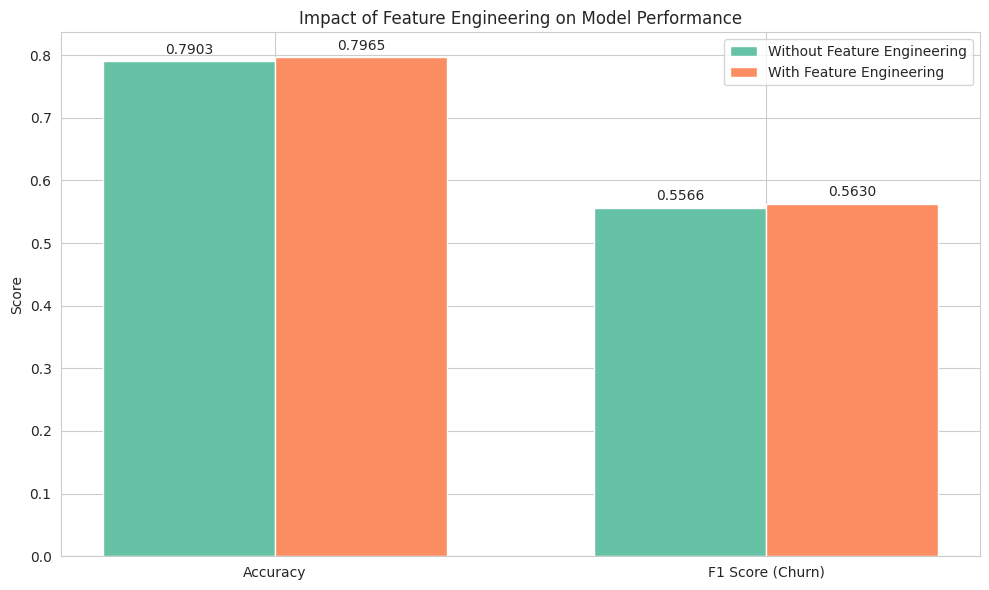

In [24]:
def compare_feature_engineering_impact():
    # Prepare data for model without engineered features
    df_basic = df_cleaned.copy()
    X_basic = df_basic.drop(['customerID', 'Churn'], axis=1)
    y_basic = df_basic['Churn']

    # Prepare data for model with engineered features
    df_eng = df_engineered.copy()
    X_eng = df_eng.drop(['customerID', 'Churn'], axis=1)
    y_eng = df_eng['Churn']

    # Function to evaluate model performance
    def evaluate_model(X, y, model_name):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Preprocessing
        categorical_cols = X.select_dtypes(include=['object']).columns
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
            ])

        # Create and train model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        pipeline.fit(X_train, y_train)

        # Evaluate model
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)

        y_pred = pipeline.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        print(f"\n{model_name} Model Performance:")
        print(f"Training Accuracy: {train_score:.4f}")
        print(f"Testing Accuracy: {test_score:.4f}")
        print(f"F1 Score (Churn class): {report['1']['f1-score']:.4f}")

        return test_score, report['1']['f1-score']

    # Compare both models
    basic_acc, basic_f1 = evaluate_model(X_basic, y_basic, "Basic (No Feature Engineering)")
    eng_acc, eng_f1 = evaluate_model(X_eng, y_eng, "Enhanced (With Feature Engineering)")

    # Plot comparison
    metrics = ['Accuracy', 'F1 Score (Churn)']
    basic_scores = [basic_acc, basic_f1]
    eng_scores = [eng_acc, eng_f1]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, basic_scores, width, label='Without Feature Engineering')
    rects2 = ax.bar(x + width/2, eng_scores, width, label='With Feature Engineering')

    ax.set_ylabel('Score')
    ax.set_title('Impact of Feature Engineering on Model Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add value labels on bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.savefig('feature_engineering_impact.png')
    plt.show()


compare_feature_engineering_impact()

## 5. Data Preprocessing

In [25]:
def preprocess_data(df, handle_outliers=True, handle_imbalance=True):
    # Create a copy
    df_processed = df.copy()

    # Drop customer ID as it's not predictive
    df_processed = df_processed.drop('customerID', axis=1)

    # Handle outliers in numerical columns if specified
    if handle_outliers:
        numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
        for col in numerical_cols:
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds for outliers (using 1.5 IQR rule)
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Show outliers distribution before clamping
            outliers = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound))
            print(f"Outliers in {col}: {outliers.sum()} ({outliers.sum()/len(df_processed)*100:.2f}%)")

            # Clamp outliers instead of removing them
            df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)

    # Split features and target
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Create preprocessing steps
    preprocessor = ColumnTransformer(
      transformers=[
          ('num', Pipeline(steps=[
              ('imputer', KNNImputer(n_neighbors=5)),
              ('scaler', StandardScaler())
          ]), numerical_cols),
          ('cat', Pipeline(steps=[
              ('imputer', SimpleImputer(strategy='most_frequent')),
              ('onehot', OneHotEncoder(handle_unknown='ignore'))
          ]), categorical_cols)
      ])

    # Handle class imbalance if specified
    if handle_imbalance:
        # Apply SMOTE only to the training data
        smote = SMOTE(random_state=42)

        # First apply the preprocessor
        X_train_processed = preprocessor.fit_transform(X_train)

        # Then apply SMOTE
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

        # Process the test data
        X_test_processed = preprocessor.transform(X_test)

        print(f"\nClass distribution before SMOTE: {pd.Series(y_train).value_counts(normalize=True)}")
        print(f"Class distribution after SMOTE: {pd.Series(y_train_resampled).value_counts(normalize=True)}")

        return X_train_resampled, X_test_processed, y_train_resampled, y_test, preprocessor
    else:
        # Just apply preprocessing without SMOTE
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)

        return X_train_processed, X_test_processed, y_train, y_test, preprocessor

# Apply preprocessing to our engineered dataset
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df_engineered)

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


### Impact of Skipping Preprocessing Steps


=== Impact of Preprocessing Steps ===

Evaluating: Complete Preprocessing
Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Evaluating: No Outlier Handling

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Evaluating: No Class Balancing
Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Evaluating: No Preprocessing


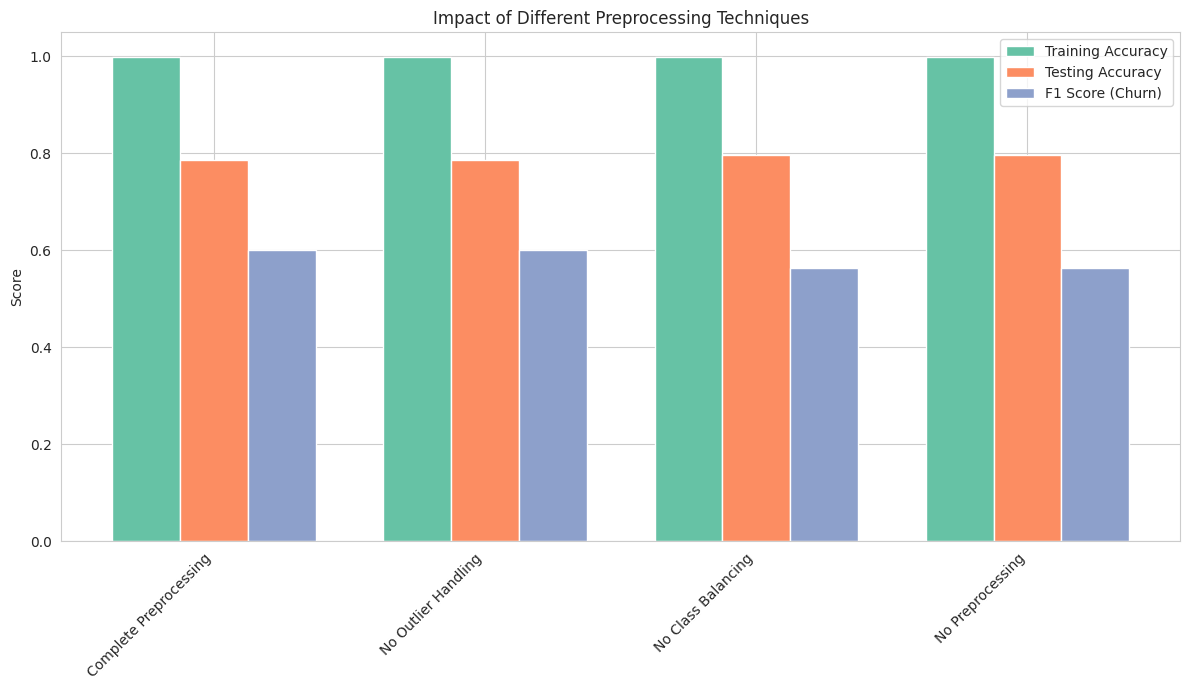


Preprocessing Impact Results:
Variation                 Train Accuracy  Test Accuracy   F1 Score       
--------------------------------------------------------------------------------
Complete Preprocessing    0.9989           0.7856           0.6002
No Outlier Handling       0.9989           0.7856           0.6002
No Class Balancing        0.9984           0.7965           0.5630
No Preprocessing          0.9984           0.7965           0.5630


In [26]:
def compare_preprocessing_impact():
    print("\n=== Impact of Preprocessing Steps ===")

    # Define variations of preprocessing
    variations = [
        ('Complete Preprocessing', True, True),
        ('No Outlier Handling', False, True),
        ('No Class Balancing', True, False),
        ('No Preprocessing', False, False)
    ]

    results = []

    for name, handle_outliers, handle_imbalance in variations:
        print(f"\nEvaluating: {name}")

        # Apply different preprocessing variations
        X_train, X_test, y_train, y_test, _ = preprocess_data(
            df_engineered,
            handle_outliers=handle_outliers,
            handle_imbalance=handle_imbalance
        )

        # Train a simple model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        y_pred = model.predict(X_test)
        f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']

        results.append((name, train_acc, test_acc, f1))

    # Plot comparison
    names = [r[0] for r in results]
    train_scores = [r[1] for r in results]
    test_scores = [r[2] for r in results]
    f1_scores = [r[3] for r in results]

    x = np.arange(len(names))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.bar(x - width, train_scores, width, label='Training Accuracy')
    ax.bar(x, test_scores, width, label='Testing Accuracy')
    ax.bar(x + width, f1_scores, width, label='F1 Score (Churn)')

    ax.set_ylabel('Score')
    ax.set_title('Impact of Different Preprocessing Techniques')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.savefig('preprocessing_impact.png')
    plt.show()

    # Print results table
    print("\nPreprocessing Impact Results:")
    print("=" * 80)
    print(f"{'Variation':<25} {'Train Accuracy':<15} {'Test Accuracy':<15} {'F1 Score':<15}")
    print("-" * 80)
    for name, train_acc, test_acc, f1 in results:
        print(f"{name:<25} {train_acc:.4f}{' '*10} {test_acc:.4f}{' '*10} {f1:.4f}")
    print("=" * 80)


compare_preprocessing_impact()

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


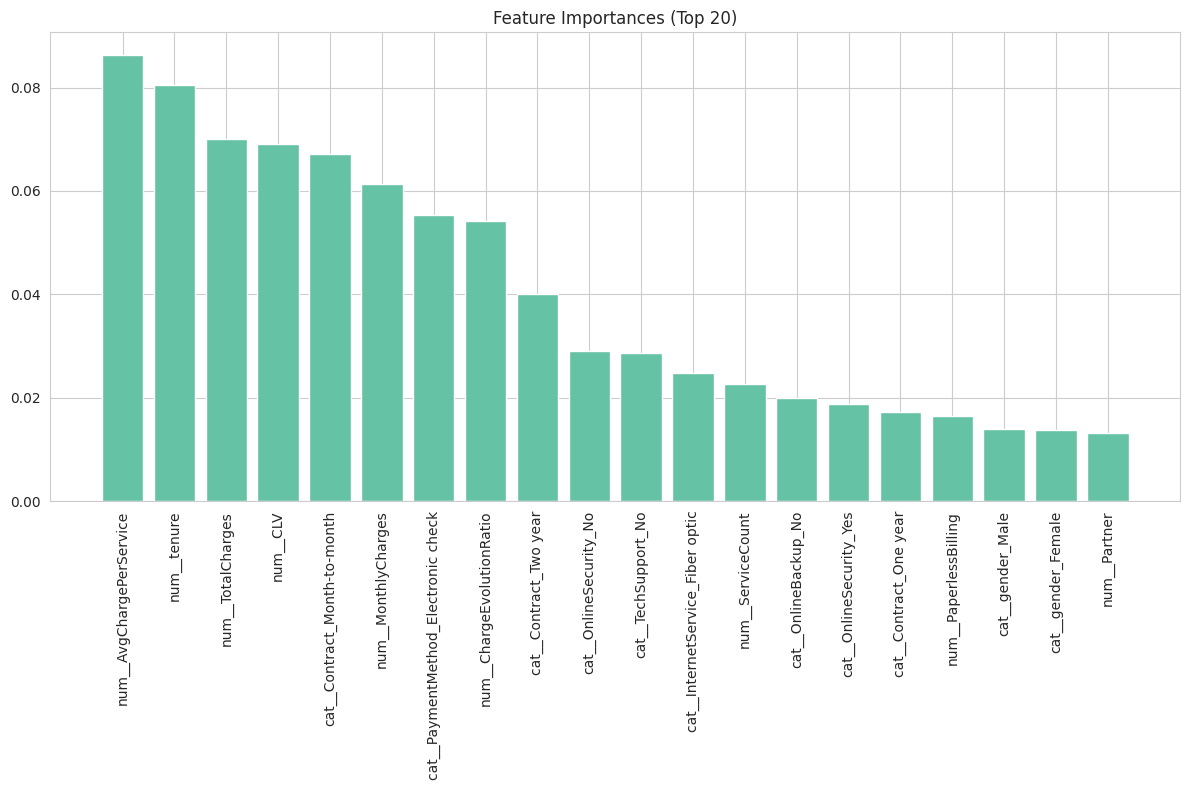

Selected 13 features out of 48
Top 10 features: ['num__AvgChargePerService', 'num__tenure', 'num__TotalCharges', 'num__CLV', 'cat__Contract_Month-to-month', 'num__MonthlyCharges', 'cat__PaymentMethod_Electronic check', 'num__ChargeEvolutionRatio', 'cat__Contract_Two year', 'cat__OnlineSecurity_No']


In [27]:
def select_features_by_importance(X_train, X_test, y_train, preprocessor=None, original_X=None, threshold=0.02):
    """
    Select features based on Random Forest importance score, compatible with preprocessed data.

    Parameters:
    -----------
    X_train: array-like
        Training features (preprocessed)
    X_test: array-like
        Testing features (preprocessed)
    y_train: Series or array
        Training target
    preprocessor: ColumnTransformer or None
        The fitted preprocessor used to transform the data
    original_X: DataFrame or None
        The original features DataFrame before preprocessing
    threshold: float
        Minimum importance score to keep features

    Returns:
    --------
    X_train_selected: array
        Selected training features
    X_test_selected: array
        Selected testing features
    selected_features_indices: list
        Indices of selected features
    """
    # Create and fit Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importances
    importances = rf.feature_importances_

    # Try to get feature names if preprocessor is available
    if preprocessor is not None and hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    elif original_X is not None:
        # Try to reconstruct feature names from original DataFrame
        num_cols = original_X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        cat_cols = original_X.select_dtypes(include=['object']).columns.tolist()
        feature_names = num_cols.copy()

        # Add dummy variables for categorical columns
        for col in cat_cols:
            unique_vals = original_X[col].unique()
            for val in unique_vals:
                feature_names.append(f"{col}_{val}")
    else:
        # If no information is available, use indices as feature names
        feature_names = [f"feature_{i}" for i in range(len(importances))]

    # Create DataFrame of feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # Ensure lengths match
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])  # Show top 20 only
    plt.xticks(rotation=90)
    plt.title('Feature Importances (Top 20)')
    plt.tight_layout()
    plt.savefig('selected_feature_importances.png')
    plt.show()

    # Select features with importance > threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
    selected_feature_names = selected_features['Feature'].tolist()

    # Create mapping of feature names to indices
    feature_indices = {name: i for i, name in enumerate(feature_names)}
    selected_features_indices = [feature_indices[name] for name in selected_feature_names
                               if name in feature_indices]

    print(f"Selected {len(selected_feature_names)} features out of {len(feature_names)}")
    print(f"Top 10 features: {selected_feature_names[:10]}")

    # Return selected features by index
    X_train_selected = X_train[:, selected_features_indices]
    X_test_selected = X_test[:, selected_features_indices]

    return X_train_selected, X_test_selected, selected_features_indices


# Apply preprocessing to our engineered dataset
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df_engineered)

# Keep the original DataFrame for reference
original_X = df_engineered.drop(['customerID', 'Churn'], axis=1)

# Call the modified function
X_train_selected, X_test_selected, selected_indices = select_features_by_importance(
    X_train, X_test, y_train,
    preprocessor=preprocessor,
    original_X=original_X,
    threshold=0.02
)

## 6. Model Building

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Using all 48 features for model building

Training Random Forest...
Random Forest Results:
  Training Accuracy: 0.9989
  Testing Accuracy: 0.7856
  F1 Score (Churn): 0.6002
  ROC AUC: 0.8391

Training Gradient Boosting...
Gradient Boosting Results:
  Training Accuracy: 0.8660
  Testing Accuracy: 0.7899
  F1 Score (Churn): 0.6402
  ROC AUC: 0.8527

Training XGBoost...
XGBoost Results:
  Training Accuracy: 0.9678
  Testing Accuracy: 0.7809
  F1 Score (Churn): 0.5949
  ROC AUC: 0.8336


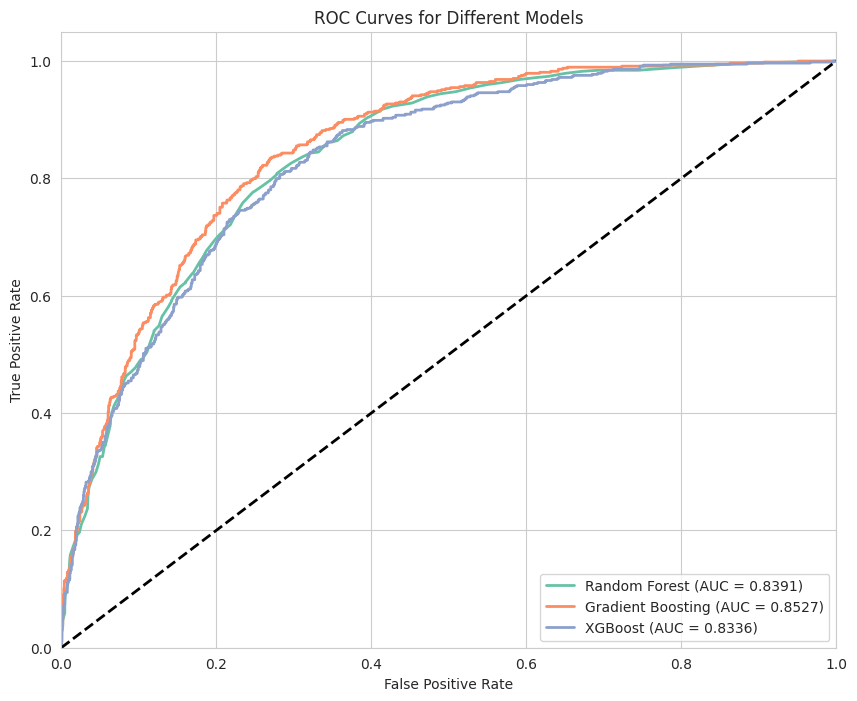

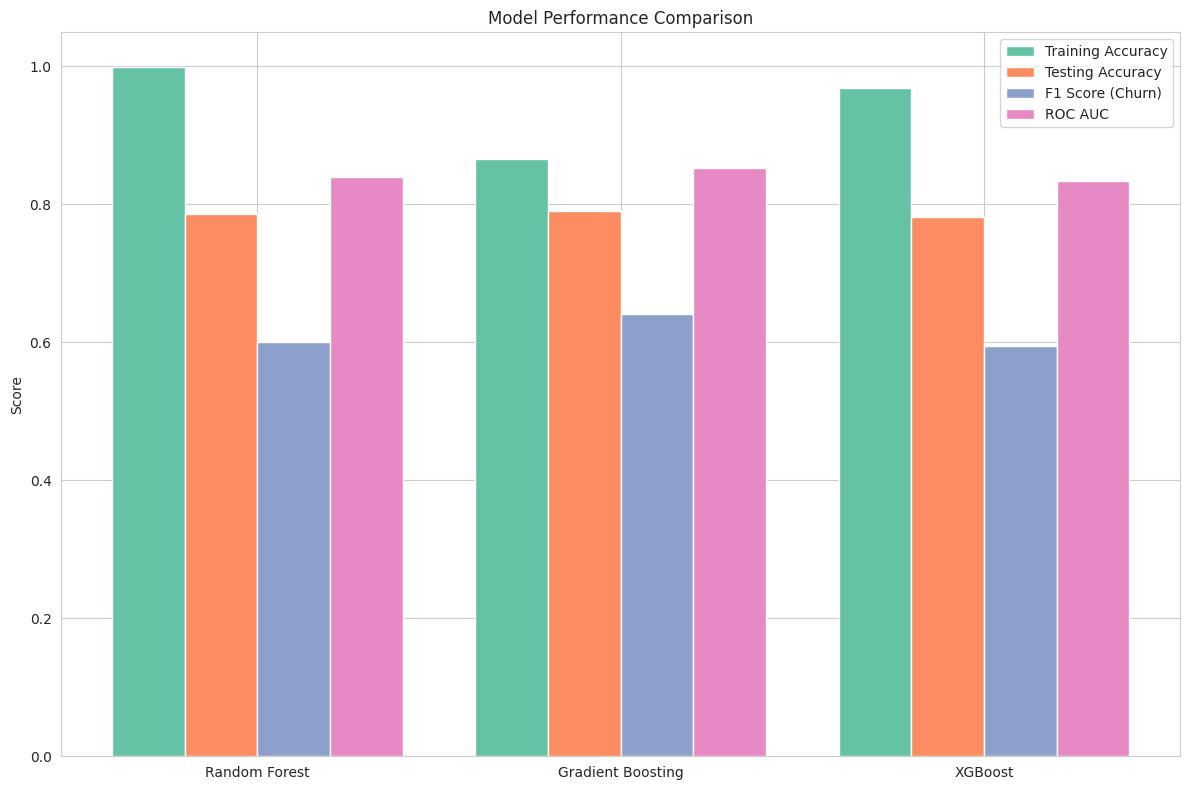


Best model based on F1 score: Gradient Boosting


In [34]:
def build_and_compare_models(df_engineered, use_selected_features=True, threshold=0.02):
    """
    Build and compare multiple models, optionally using feature selection.

    Parameters:
    -----------
    df_engineered: DataFrame
        The engineered features dataframe
    use_selected_features: bool
        Whether to use feature selection or not
    threshold: float
        Minimum importance score to keep features if feature selection is enabled

    Returns:
    --------
    best_model: model object
        The best performing model
    best_model_name: str
        Name of the best model
    results: dict
        Dictionary containing all model results
    """
    # Get our preprocessed data
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df_engineered)

    # Apply feature selection if requested
    if use_selected_features:
        original_X = df_engineered.drop(['customerID', 'Churn'], axis=1)
        X_train, X_test, selected_indices = select_features_by_importance(
            X_train, X_test, y_train,
            preprocessor=preprocessor,
            original_X=original_X,
            threshold=threshold
        )
        print(f"Using {X_train.shape[1]} selected features for model building")
    else:
        print(f"Using all {X_train.shape[1]} features for model building")

    # Define models to compare
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")

        model.fit(X_train, y_train)

        # Evaluate on training and test data
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        f1_churn = report['1']['f1-score']

        # Calculate ROC and AUC
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Store results
        results[name] = {
            'model': model,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'f1_churn': f1_churn,
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }

        print(f"{name} Results:")
        print(f"  Training Accuracy: {train_acc:.4f}")
        print(f"  Testing Accuracy: {test_acc:.4f}")
        print(f"  F1 Score (Churn): {f1_churn:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}")

    # Plot ROC curves
    plt.figure(figsize=(10, 8))

    for name, result in results.items():
        plt.plot(result['fpr'], result['tpr'], lw=2,
                label=f"{name} (AUC = {result['roc_auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc="lower right")
    plt.savefig('model_roc_curves.png')
    plt.show()

    # Plot model performance comparison
    metrics = ['Training Accuracy', 'Testing Accuracy', 'F1 Score (Churn)', 'ROC AUC']
    model_names = list(results.keys())

    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(model_names))
    width = 0.2

    for i, metric in enumerate(metrics):
        metric_values = []
        for name in model_names:
            if metric == 'Training Accuracy':
                metric_values.append(results[name]['train_acc'])
            elif metric == 'Testing Accuracy':
                metric_values.append(results[name]['test_acc'])
            elif metric == 'F1 Score (Churn)':
                metric_values.append(results[name]['f1_churn'])
            elif metric == 'ROC AUC':
                metric_values.append(results[name]['roc_auc'])

        ax.bar(x + (i - 1.5) * width, metric_values, width, label=metric)

    ax.set_ylabel('Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

    # Return the best model
    best_model = None
    best_f1 = -1

    # Find the best model based on F1 score
    for name, result in results.items():
        if result['f1_churn'] > best_f1:
            best_f1 = result['f1_churn']
            best_model = result['model']
            best_model_name = name

    print(f"\nBest model based on F1 score: {best_model_name}")
    return best_model, best_model_name, results

best_model, best_model_name, model_results = build_and_compare_models(df_engineered,use_selected_features=False)

### Handel Overfitting Usnig Regularized Model

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Using all 48 features for regularized model building

Training Random Forest (Regularized)...
Random Forest (Regularized) Results:
  Training Accuracy: 0.8587
  Testing Accuracy: 0.7837
  F1 Score (Churn): 0.6556
  ROC AUC: 0.8561
  Training-Testing Accuracy Gap: 0.0750

Training Gradient Boosting (Regularized)...
Gradient Boosting (Regularized) Results:
  Training Accuracy: 0.8839
  Testing Accuracy: 0.7903
  F1 Score (Churn): 0.6262
  ROC AUC: 0.8512
  Training-Testing Accuracy Gap: 0.0936

Training XGBoost (Regularized)...
XGBoost (Regularized) Results:
  Training Accuracy: 0.8740
  Testing Accuracy: 0.7932
  F1 Score (Churn): 0.6361
  ROC AUC: 0.8546
  Training-Testing Accuracy Gap: 0.0808


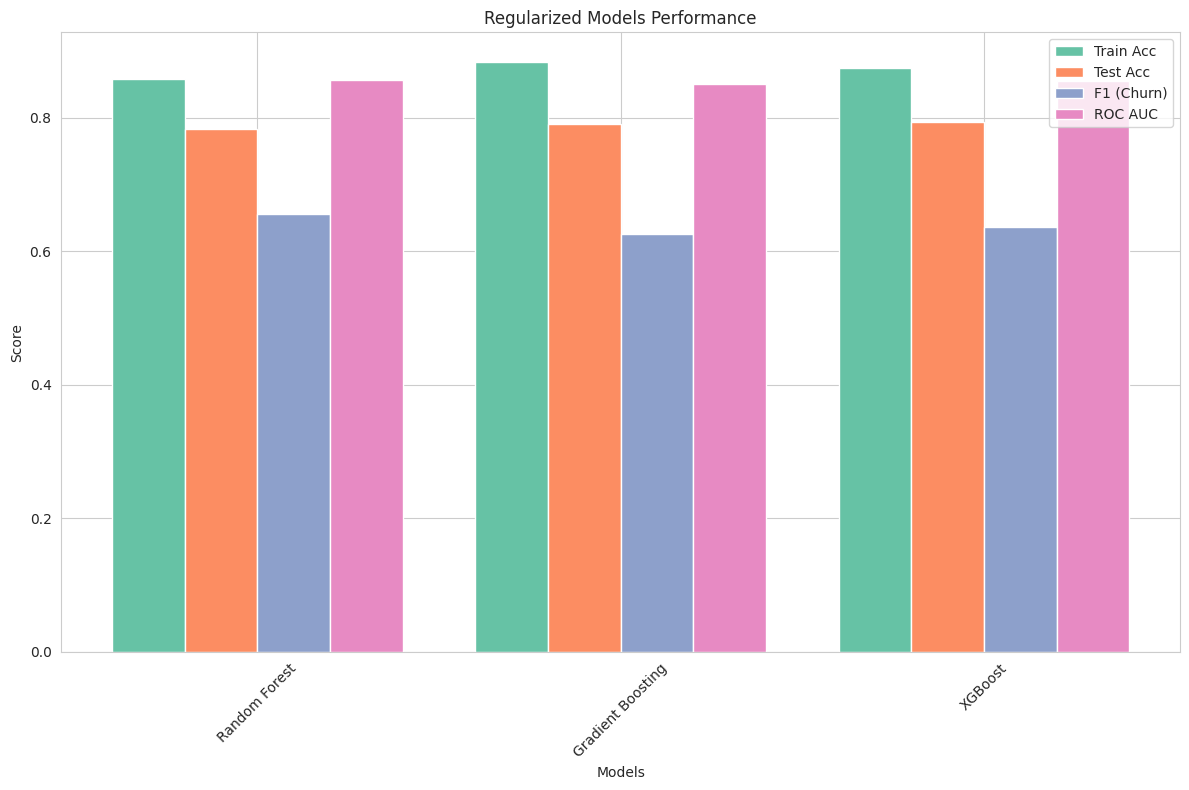

In [38]:
def build_regularized_models(df_engineered, use_selected_features=True, threshold=0.02):
    """
    Build regularized models to prevent overfitting, with optional feature selection.

    Parameters:
    -----------
    df_engineered: DataFrame
        The engineered features dataframe
    use_selected_features: bool
        Whether to use feature selection or not
    threshold: float
        Minimum importance score to keep features if feature selection is enabled

    Returns:
    --------
    results: dict
        Dictionary with model results
    """
    # Get our preprocessed data
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df_engineered)

    # Apply feature selection if requested
    if use_selected_features:
        original_X = df_engineered.drop(['customerID', 'Churn'], axis=1)
        X_train, X_test, selected_indices = select_features_by_importance(
            X_train, X_test, y_train,
            preprocessor=preprocessor,
            original_X=original_X,
            threshold=threshold
        )
        print(f"Using {X_train.shape[1]} selected features for regularized model building")
    else:
        print(f"Using all {X_train.shape[1]} features for regularized model building")

    # Define regularized models
    models = {
        'Random Forest (Regularized)': RandomForestClassifier(
            random_state=42,
            max_depth=8,              # Limit tree depth
            min_samples_split=10,     # Minimum samples to split a node
            min_samples_leaf=4,       # Minimum samples in leaf node
            max_features='sqrt'       # Use square root of features
        ),
        'Gradient Boosting (Regularized)': GradientBoostingClassifier(
            random_state=42,
            learning_rate=0.05,       # Slower learning rate
            max_depth=4,              # Shallow trees
            min_samples_split=10,
            min_samples_leaf=4,
            subsample=0.8,            # Use 80% of samples per tree
            n_estimators=200          # Use more trees with slower learning
        ),
        'XGBoost (Regularized)': XGBClassifier(
            random_state=42,
            learning_rate=0.05,
            max_depth=4,
            min_child_weight=4,       # Similar to min_samples_leaf
            subsample=0.8,
            colsample_bytree=0.8,     # Use 80% of features per tree
            reg_alpha=0.1,            # L1 regularization
            reg_lambda=1.0,           # L2 regularization
            n_estimators=200
        )
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")

        model.fit(X_train, y_train)

        # Evaluate on training and test data
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        f1_churn = report['1']['f1-score'] if '1' in report else report['True']['f1-score']

        # Calculate ROC and AUC
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Store results
        results[name] = {
            'model': model,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'f1_churn': f1_churn,
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }

        print(f"{name} Results:")
        print(f"  Training Accuracy: {train_acc:.4f}")
        print(f"  Testing Accuracy: {test_acc:.4f}")
        print(f"  F1 Score (Churn): {f1_churn:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}")
        print(f"  Training-Testing Accuracy Gap: {train_acc - test_acc:.4f}")

    return results


  # Run the regularized model building function with feature selection
reg_results = build_regularized_models(
    df_engineered,
    use_selected_features=False,  # Enable feature selection
    threshold=0.02  # Keep features with importance > 0.02
)

# Alternatively, run without feature selection
# reg_results = build_regularized_models(
#     df_engineered,
#     use_selected_features=False
# )

# Plot comparison of regularized models
plt.figure(figsize=(12, 8))
x = np.arange(len(reg_results))
width = 0.2

metrics = ['Train Acc', 'Test Acc', 'F1 (Churn)', 'ROC AUC']
model_names = list(reg_results.keys())

for i, metric in enumerate(['train_acc', 'test_acc', 'f1_churn', 'roc_auc']):
    values = [reg_results[name][metric] for name in model_names]
    plt.bar(x + (i - 1.5) * width, values, width, label=metrics[i])

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Regularized Models Performance')
plt.xticks(x, [name.split(' (')[0] for name in model_names], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('regularized_models_comparison.png')
plt.show()


## 7. Model Evaluation

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


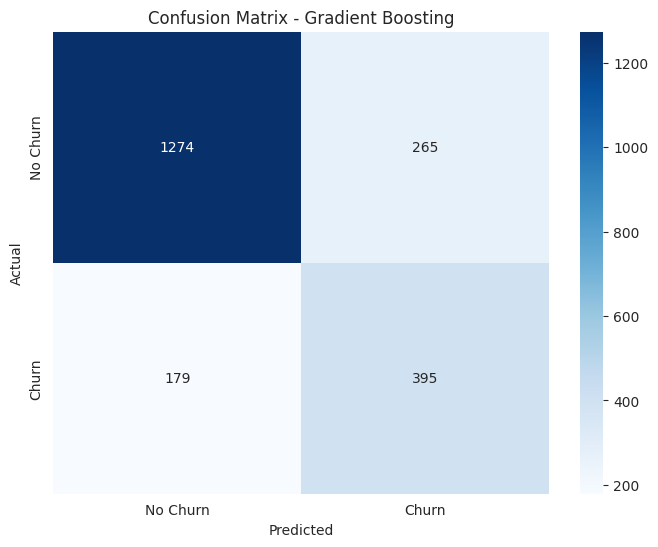


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1539
           1       0.60      0.69      0.64       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.79      0.79      2113



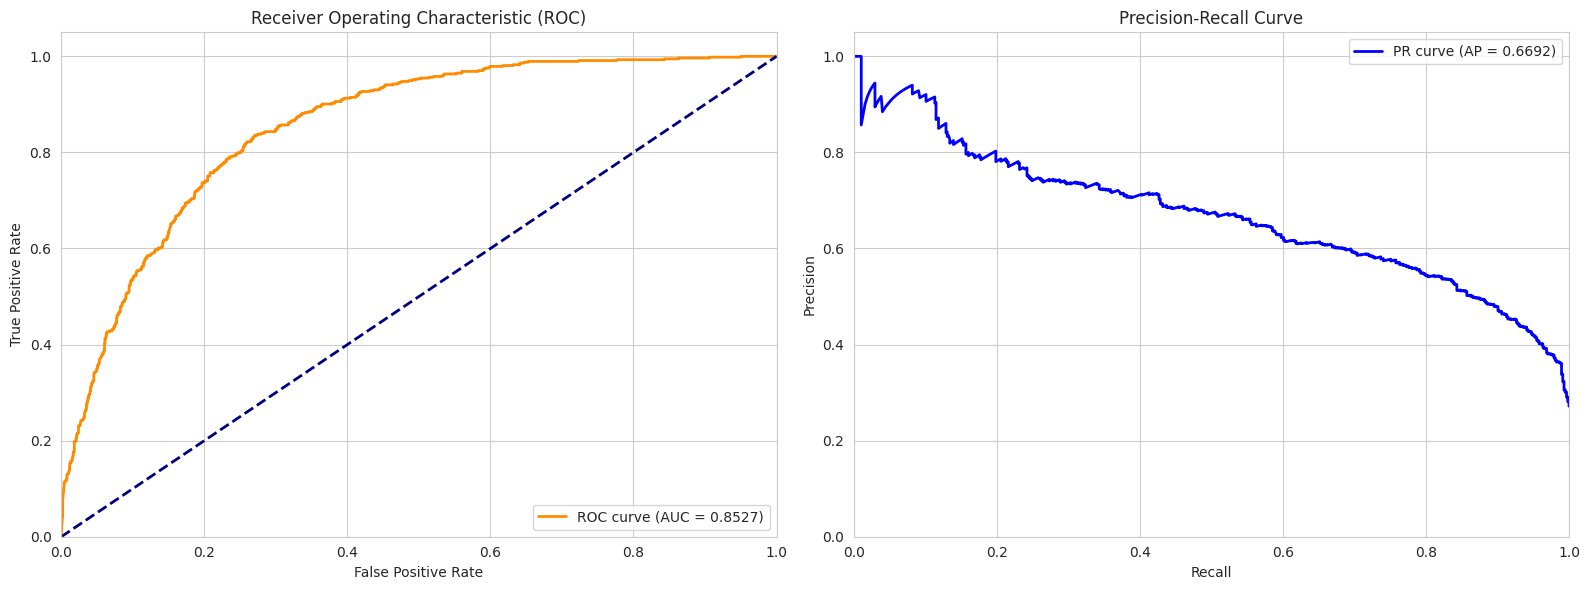

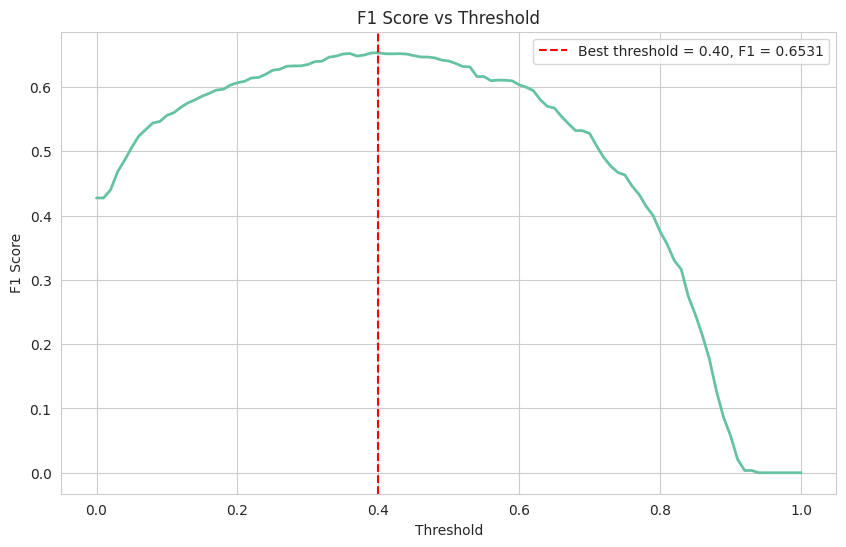


Optimal threshold for prediction: 0.40
F1 score at optimal threshold: 0.6531

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1539
           1       0.56      0.79      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113



In [ ]:
def evaluate_best_model(model, model_name):
    # Get preprocessed data
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df_engineered)

    # Generate predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC curve and precision-recall curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    ax1.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC curve (AUC = {roc_auc:.4f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC)')
    ax1.legend(loc="lower right")

    # Precision-Recall curve
    from sklearn.metrics import precision_recall_curve, average_precision_score

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)

    ax2.plot(recall, precision, color='blue', lw=2,
            label=f'PR curve (AP = {avg_precision:.4f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.savefig('model_curves.png')
    plt.show()

    # Find optimal threshold
    from sklearn.metrics import f1_score

    thresholds = np.arange(0, 1.01, 0.01)
    f1_scores = []

    for threshold in thresholds:
        y_pred_t = (y_prob >= threshold).astype(int)
        f1_scores.append(f1_score(y_test, y_pred_t))

    best_threshold_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_threshold_idx]
    best_f1 = f1_scores[best_threshold_idx]

    # Plot F1 score vs threshold
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, lw=2)
    plt.axvline(best_threshold, color='r', linestyle='--',
              label=f'Best threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold')
    plt.legend()
    plt.savefig('threshold_tuning.png')
    plt.show()

    print(f"\nOptimal threshold for prediction: {best_threshold:.2f}")
    print(f"F1 score at optimal threshold: {best_f1:.4f}")

    # Apply best threshold and recalculate metrics
    y_pred_optimal = (y_prob >= best_threshold).astype(int)

    print("\nClassification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal))

    return best_threshold


if 'best_model' in locals():
  optimal_threshold = evaluate_best_model(best_model, best_model_name)

## 8. Model Improvement


## 9. Final Model and Interpretation

Outliers in tenure: 0 (0.00%)
Outliers in MonthlyCharges: 0 (0.00%)
Outliers in TotalCharges: 0 (0.00%)

Class distribution before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Class distribution after SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Running hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation score: 0.8365

Best Model Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1539
           1       0.59      0.70      0.64       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.79      0.79      2113



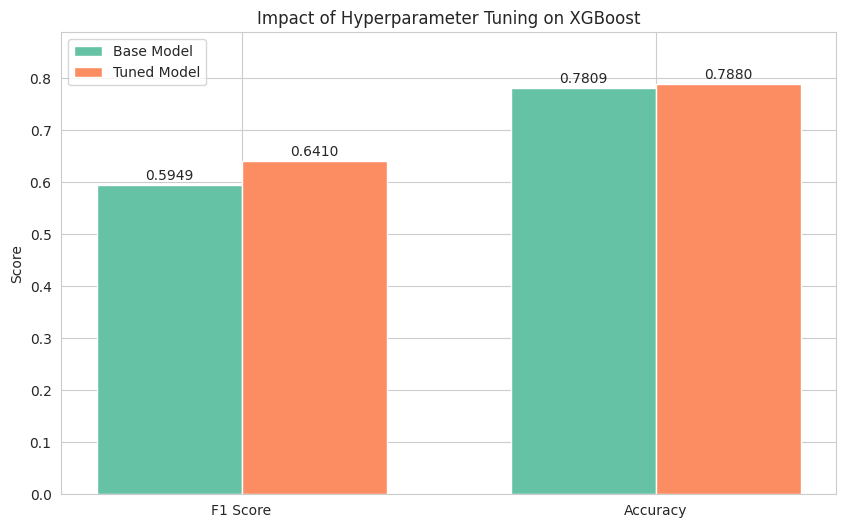


Improvements after hyperparameter tuning:
F1 Score: +7.75%
Accuracy: +0.91%


In [41]:
def hyperparameter_tuning(model_type):
    """
    Perform hyperparameter tuning on the specified model type

    Args:
        model_type (str): Type of model to tune ('Random Forest', 'Gradient Boosting', or 'XGBoost')

    Returns:
        The best model after tuning
    """
    # Get preprocessed data
    X_train, X_test, y_train, y_test, _ = preprocess_data(df_engineered)

    # Define parameter grids for each model
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'XGBoost': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'colsample_bytree': [0.7, 0.8, 0.9],
            'subsample': [0.7, 0.8, 0.9]
        }
    }

    # Select model and parameter grid
    if model_type == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
    elif model_type == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
    elif model_type == 'XGBoost':
        model = XGBClassifier(random_state=42)
    else:
        raise ValueError("Invalid model type. Choose 'Random Forest', 'Gradient Boosting', or 'XGBoost'")

    param_grid = param_grids[model_type]

    # Run grid search with cross-validation
    print(f"Running hyperparameter tuning for {model_type}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Print results
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate the best model
    best_model = grid_search.best_estimator_

    print("\nBest Model Evaluation:")
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Compare with base model
    base_model = None
    if model_type == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif model_type == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif model_type == 'XGBoost':
        base_model = XGBClassifier(random_state=42)

    base_model.fit(X_train, y_train)
    y_pred_base = base_model.predict(X_test)

    # Calculate metrics for both models
    base_f1 = f1_score(y_test, y_pred_base)
    tuned_f1 = f1_score(y_test, y_pred)

    base_accuracy = accuracy_score(y_test, y_pred_base)
    tuned_accuracy = accuracy_score(y_test, y_pred)

    # Plot comparison
    plt.figure(figsize=(10, 6))

    metrics = ['F1 Score', 'Accuracy']
    base_scores = [base_f1, base_accuracy]
    tuned_scores = [tuned_f1, tuned_accuracy]

    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, base_scores, width, label='Base Model')
    plt.bar(x + width/2, tuned_scores, width, label='Tuned Model')

    plt.ylabel('Score')
    plt.title(f'Impact of Hyperparameter Tuning on {model_type}')
    plt.xticks(x, metrics)
    plt.legend()

    # Add values on bars
    for i, v in enumerate(base_scores):
        plt.text(i - width/2, v + 0.01, f'{v:.4f}', ha='center')

    for i, v in enumerate(tuned_scores):
        plt.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center')

    plt.ylim(0, max(max(base_scores), max(tuned_scores)) + 0.1)

    plt.savefig('hyperparameter_tuning_impact.png')
    plt.show()

    # Print improvement
    f1_improvement = (tuned_f1 - base_f1) / base_f1 * 100
    acc_improvement = (tuned_accuracy - base_accuracy) / base_accuracy * 100

    print(f"\nImprovements after hyperparameter tuning:")
    print(f"F1 Score: +{f1_improvement:.2f}%")
    print(f"Accuracy: +{acc_improvement:.2f}%")

    return best_model, grid_search.best_params_


# Assume we found XGBoost to be the best model from our previous comparison
best_tuned_model, best_params = hyperparameter_tuning('XGBoost')


## 12. Conclusion

This tutorial has covered the complete process of building a customer churn prediction model:

1. **Data Cleaning**: Handling missing values and converting data types
2. **Exploratory Data Analysis**: Understanding the patterns and relationships in the data
3. **Feature Engineering**: Creating new features to improve model performance
4. **Data Preprocessing**: Handling outliers, encoding categorical variables, and balancing classes
5. **Model Building**: Training and comparing different models
6. **Model Tuning**: Optimizing hyperparameters to improve performance
7. **Model Evaluation**: Assessing model performance with various metrics
8. **Deployment**: Creating a production-ready pipeline for making predictions

Each step is crucial for building a high-performance model, and we've shown the impact of skipping or including each step. By following this comprehensive approach, you can create accurate and reliable churn prediction models for real-world applications.

## Key Takeaways for Students:

1. **Data quality is paramount**: Missing values, outliers, and incorrect data types can significantly impact model performance.
2. **Feature engineering often makes the difference**: Creating meaningful features based on domain knowledge can dramatically improve model performance.
3. **Class imbalance matters**: Techniques like SMOTE can help address the common issue of imbalanced classes in churn prediction.
4. **Model selection is important**: Different algorithms have different strengths; always compare multiple models.
5. **Hyperparameter tuning improves results**: Fine-tuning model parameters can provide significant performance gains.
6. **Threshold tuning is often overlooked**: Adjusting the classification threshold can optimize model performance for specific business goals.
7. **Interpretability provides insights**: Understanding which features drive predictions helps build trust in the model and provides business insights.